In [ ]:
#Script created by Neha on 2022-10-04
#Script is designed to analyze Applebees Site traffic analysis on APP only
#Github repo: https://github.com/matt-walentosky-bt/applebees_user_pathing_analysis

In [ ]:
#Import desired packages
import ga4_user_pathing
import pandas as pd
import os

In [ ]:
#Parameters from Tyler Norris / Vanessa Schneider
# Globals:
COUNT_FIELD = 'counts' # DF fields references to aggregations value (users, sessions)
NODE_OPACITY = .9
LINK_OPACITY = .6
SEP_VAL = ' > '
KEY_PATH = '/Users/vanessaschneider/keys/dse-chase-user-pathing.json'

In [ ]:
#Get working directory
os.getcwd()

In [140]:
#Read desired document
conversion_status = True

if conversion_status == True:
    df = pd.read_csv("APP_converters_user_pathing.csv")
else:
    df = pd.read_csv("APP_non_converters_user_pathing.csv")
    
#Note, we can only pull fraction of data from BQ into CSV format   

In [141]:
print(df.shape)
print("----")
print(df.head())

(16204, 3)
----
                                             journey  conversion_flg  counts
0  viewed_favourite_store > Menu > added_item > C...            True    1381
1               Menu > added_item > CheckoutActivity            True    1303
2         Menu > added_item > CheckoutViewController            True    1165
3             Quick_Reorder > CheckoutViewController            True    1025
4  viewed_favourite_store > added_item > Checkout...            True     753


In [142]:
df['journey_length'] = df.apply(lambda x: len(x['journey'].split(SEP_VAL)), axis=1)

In [143]:
df.describe()

,counts,journey_length
count,16204.000000,16204.000000
mean,2.571155,11.572822
std,25.876421,5.027009
min,0.000000,1.000000
25%,1.000000,8.000000
50%,1.000000,11.000000
75%,1.000000,14.000000
max,1381.000000,95.000000


In [145]:
df.head()

,journey,conversion_flg,counts,journey_length
0,viewed_favourite_store > Menu > added_item > C...,True,1381,4
1,Menu > added_item > CheckoutActivity,True,1303,3
2,Menu > added_item > CheckoutViewController,True,1165,3
3,Quick_Reorder > CheckoutViewController,True,1025,2
4,viewed_favourite_store > added_item > Checkout...,True,753,3


In [146]:
df.head(30).to_csv(('/Users/nehakhatri/Local_Python/Applebees/converters_top30.csv'))

<AxesSubplot: >

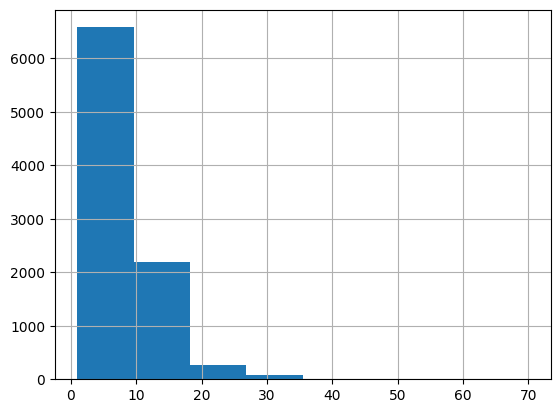

In [119]:
# Change min journey lenght and number of bins to further explore
df[df['journey_length'] > 0]['journey_length'].hist(bins=8)

<AxesSubplot: >

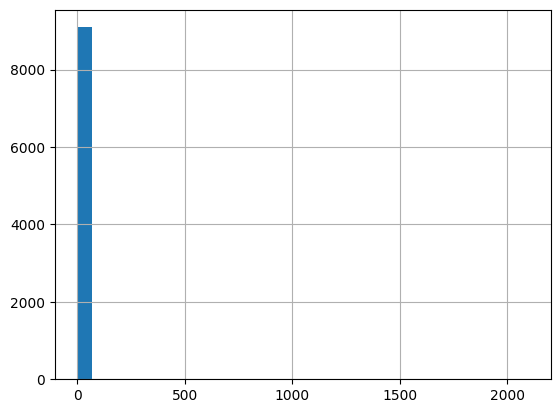

In [120]:
df[df['journey_length'] > 1]['counts'].hist(bins=30)

In [132]:
df.head(25)

,journey,conversion_flg,counts,journey_length,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10
0,Menu > Journey End,False,5029,1,Menu,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Quick_Reorder > Journey End,False,4187,1,Quick_Reorder,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,viewed_favourite_store > Journey End,False,2572,1,viewed_favourite_store,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,viewed_favourite_store > Menu > Journey End,False,2098,2,viewed_favourite_store,Menu,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appetizers > Journey End,False,2015,1,Appetizers,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Menu > added_item > Journey End,False,975,2,Menu,added_item,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,viewed_favourite_store > Appetizers > Journey End,False,896,2,viewed_favourite_store,Appetizers,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Appetizers > Menu > Journey End,False,774,2,Appetizers,Menu,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Menu > Appetizers > Journey End,False,628,2,Menu,Appetizers,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Drinks > Journey End,False,618,1,Drinks,Journey End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df = ga4_user_pathing.add_journey_end_string(df, journey_col='journey', conversion_column='Conversion', sep_val=' > ')
df = ga4_user_pathing.parse_steps(df, sep_val=' > ', max_steps=10)

In [124]:
df['journey'][1]

'Quick_Reorder > Journey End'

In [ ]:
#df_filtered.columns

In [ ]:
#df_filtered = ga4_user_pathing.remove_long_tail_jouneys(df, count_col='counts', min_path_count=10)

In [133]:
df_filtered = df[(df['journey_length'] >= 3) & (df['journey_length'] <= 9)]
df_filtered = df_filtered.sort_values('counts', ascending = False)
df_filtered = df_filtered.iloc[0:10,:]

In [135]:

df_filtered.to_csv('/Users/nehakhatri/Local_Python/Applebees/non_converters_top1_ge3_jl.csv')

In [136]:
df_filtered.columns

Index(['journey', 'conversion_flg', 'counts', 'journey_length', 'step_1',
       'step_2', 'step_3', 'step_4', 'step_5', 'step_6', 'step_7', 'step_8',
       'step_9', 'step_10'],
      dtype='object')

In [137]:
df_sankey, df_index = ga4_user_pathing.generate_sankey_inputs(df_filtered, COUNT_FIELD, .9)

/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:253: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:261: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [131]:
#df_filtered.head(15)
#df_filtered.to_csv('/Users/nehakhatri/Local_Python/Applebees/non_converters_top10.csv')
#df_filtered.to_csv('/Users/nehakhatri/Local_Python/Applebees/non_converters_top1_ge3_jl.csv')

In [138]:
df_sankey.head()

,source,target,counts,source_index,color,target_index
0,Appetizers,Journey End,251,3,"rgba(128, 68, 123, 0.9)",1
1,Appetizers,Menu,648,3,"rgba(128, 68, 123, 0.9)",0
2,Appetizers,added_item,631,3,"rgba(128, 68, 123, 0.9)",2
3,Menu,Appetizers,597,0,"rgba(142, 140, 153, 0.9)",3
4,Menu,Journey End,1003,0,"rgba(142, 140, 153, 0.9)",1


In [139]:
ga4_user_pathing.display_sankey(df_sankey, df_index, count_field=COUNT_FIELD, link_opacity=.3)